In [45]:
import skvideo.io
import pandas as pd
import numpy as np

In [111]:
VIDEO_FILE_NAME = '../../video/raw/VID_20180325_143338.mp4'
VIDEO_LABELS_FILE_NAME = 'data/VID_20180325_143338.mp4.csv'
VIDEO_NAME = VIDEO_FILE_NAME.split('/')[-1]
VIDEO_NAME

'VID_20180325_143338.mp4'

In [11]:
video_x = skvideo.io.vread(VIDEO_FILE_NAME)

In [39]:
# get all the rows as a numpy matrix excluding the index column
video_y = pd.read_csv(VIDEO_LABELS_FILE_NAME, sep=',').values[:,1:]

X_LABEL_COLUMN = 0
Y_LABEL_COLUMN = 1


In [48]:
DATASET_SIZE = len(video_x)
DATASET_SIZE

1335

In [23]:
video_x.shape, video_y.shape

((1335, 480, 720, 3), (1335, 3))

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

In [85]:
raw_video_height, raw_video_width  = video_x.shape[1:3]
raw_video_height, raw_video_width

(480, 720)

In [86]:
# look at the data

def display_image_with_label(img, label):
    height, width = img.shape[0:2]
    plt.imshow(img)
    plt.axvline(label[X_LABEL_COLUMN] * width, c='b')
    plt.axhline(label[Y_LABEL_COLUMN] * height, c='r')
    plt.show()

In [95]:
def show_sample_images_with_labels(images, labels, n=5):
    
    random_frame_indixes = np.random.randint(0, high=DATASET_SIZE, size=n)

    for index in random_frame_indixes:
        display_image_with_label(images[index], labels[index])

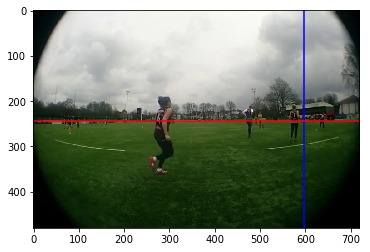

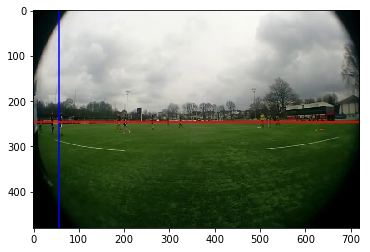

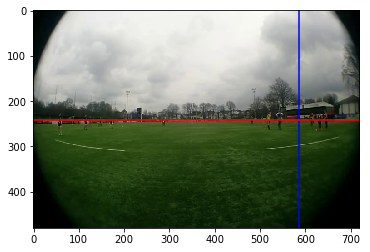

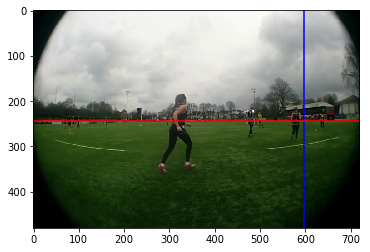

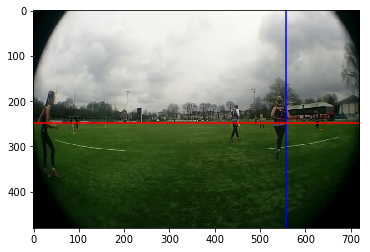

In [97]:
np.random.seed(42)
show_sample_images_with_labels(video_x, video_y, n=5)

In [88]:
from skimage.transform import resize

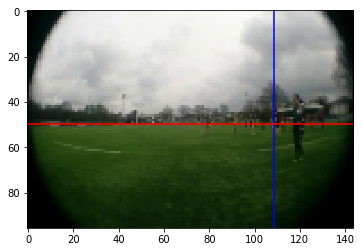

(96, 144, 3)

In [89]:
scale_factor = 5
row = 4
resized_images = resize(video_x[row], (int(480/scale_factor), int(720/scale_factor), 3))
display_image_with_label(resized_images, video_y[row])
resized_images.shape

In [91]:
scale_factor = 5

compressed_height = int(raw_video_height/scale_factor)
compressed_width = int(raw_video_width/scale_factor)

compressed_video = np.zeros((DATASET_SIZE, compressed_height, compressed_width, 3))
compressed_video.shape

(1335, 96, 144, 3)

In [93]:
compressed_video[1].shape

(96, 144, 3)

In [94]:
for i in range(DATASET_SIZE):
    compressed_video[i] = resize(video_x[i], 
                                 output_shape=(compressed_height, compressed_width, 3))
    if (i % 200) == 0:
        print('compressed {} images'.format(i))
print('completed image compression')

compressed 0 images
compressed 200 images
compressed 400 images
compressed 600 images
compressed 800 images
compressed 1000 images
compressed 1200 images


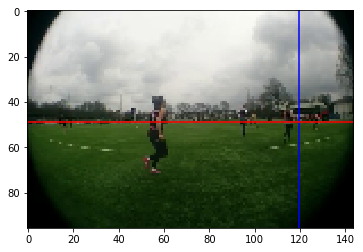

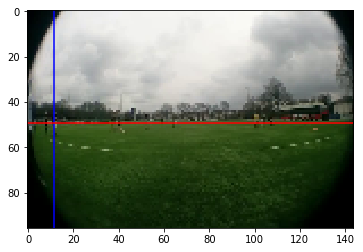

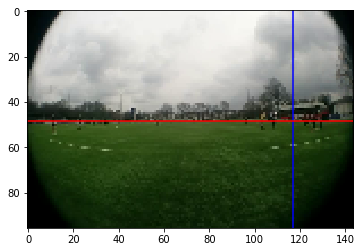

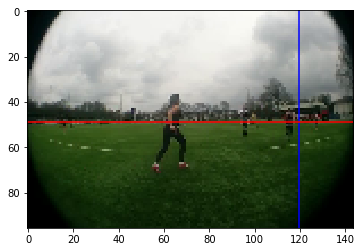

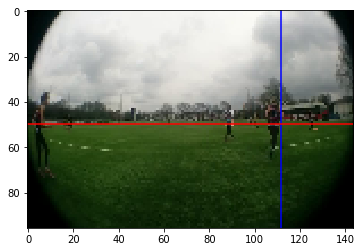

In [98]:
np.random.seed(42)
show_sample_images_with_labels(compressed_video, video_y, n=5)

In [100]:
def rgb_to_gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [103]:
gray_compressed_images = rgb_to_gray(compressed_video)
gray_compressed_images.shape

(1335, 96, 144)

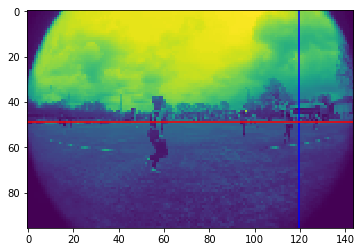

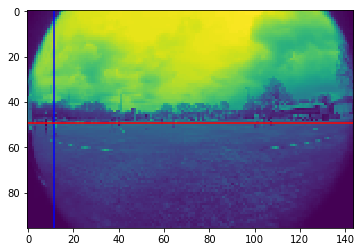

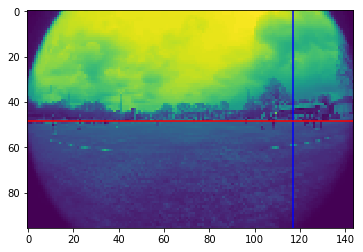

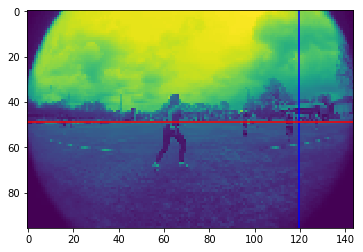

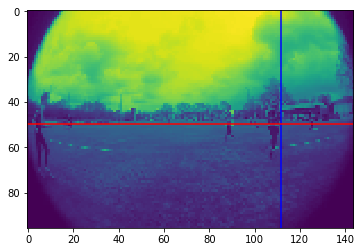

In [102]:
np.random.seed(42)
show_sample_images_with_labels(gray_compressed_images, video_y, n=5)

In [125]:
np.save('data/gray_compressed_data_'+VIDEO_NAME, gray_compressed_images)

In [127]:
!ls data

VID_20180325_143338.mp4.csv
gray_compressed_data_VID_20180325_143338.mp4.npy
